## Bisection

The intermediate value theorem states that if $f$ is a continuous function whose domain contains the interval $[a, b]$, then it takes on any given value between $f(a)$ and $f(b)$ at some point within the interval.  An important corollary is *Bolzano's theorem*: If a continuous function has values of opposite sign inside an interval, then it has a root in that interval.

The bisection method assumes that you have first bracketed the root so have found an interval $[a,b]$ where $f(a)*f(b) < 0$.  Our goal is to find $p \in [a,b]$, such that $f(p)=0$. Our initial situation looks something like what is depicted in black in the following plot:

<img src="./img/bisection.png" width="400">

In this example $f(a)<0$ and $f(b)>0$ but it could be the other way around.  Our strategy is divide the interval in half, identify which half of the interval contains the root and then repeat the process until our interval is smaller than some tolerance.  In each interval, our guess for the root $p$ will be the midpoint of the interval.  So, for our first step, $a_1=a$ and $b_1=b$ and our first guess for the root will be $p_1=\frac{a_1+a_2}{2}$.  It is also easy to check the backward error, i.e. how well our current guess satisfies the root condition as $E_b=|f(p_1)-0|=|f(p_1)|$ is easily calculated exactly.  We can bound the forward error, how close our guess is to the actual root $p$, as $E_f=|p_1 - p| \leq |p_1 - a_1|=|p_1 - b_1|$, but not calculate it exactly.  We then replace the endpoint that gives the same sign as $f(p_1)$ with $p_1$.  This gives us a new interval to search that is half the width of the original.  We can then repeat until one, or both, of the forward or backwards errors are smaller than a tolerance.  A python code to do this is below.

In [61]:
import numpy as np

def bisection(f, a, b, tol, maxN = 100, output = True):
    # We require that the root is bracketed which means that the function must 
    # have a different sign when evaluated at each endpoint.  If the function
    # is not bracketed we return a nan
    if (f(a)*f(b) > 0):
        print("Error: Root is not bracketed")
        return np.nan

    # print output table headings
    if (output):
        print("         p_i                    f(p_i)                         [a_(i+1), b_(i+1)]") 

    # main loop
    for i in range(1,maxN):
        p = (a + b)/2
        if (f(a)*f(p) < 0):
            b = p
        else: 
            a = p

        if (output):
            print(f"{p:>20} {f(p):>24}     [{a:>20},{b:>20}]")

        if ((abs(b-a) < tol) or (f(p) == 0)) :
            print("Converged in", i, "iterations")
            return p

    # if we finish the main loop without returning from the bisection function, we have failed.  :( 
    print(f"Error: Could not find root to within {tol} in {maxN} iterations. Returning best guess so far.")
    return p

Note that we could have used a `while` loop, with the forward/backward error test as the condition, for the main loop.  However, there is the possibility that if a user asked for too tight a tolerance the required number of iterations could be very large.  By setting a maximum number of iterations (the `maxN` optional arguement) we avoid this possibility.  Output can be very useful to see the process of convergence, and for debugging if you were coding this yourself.  However, for larger numbers of iterations it could be cumbersome so it is useful to give the possibility of suppressing it (by setting the optional `output = False` in the call to bisection).  

Note that if $f(a)*f(p) < 0$ then $[a,p]$ is an interval containing a root that has half the width of the prior search interval.  If $f(a)*f(p) > 0$ then, as $f(a)$ and $f(b)$ have opposite signs, we can be sure that $f(p)$ and $f(b)$ also have opposite signs so we can take $[p,b]$ for our new search interval.  Our stopping condition here is just the forward error bound test.  We need to still include the test on the vanishing of the backward error $f(p)=0$ as our `if` condition for the new interval could fail if $f(p) = 0$. 

**Example:** Let's use our bisection function to find a root of the function $f(x)=e^{-x}\cos{x}$.  Our first step is the bracket a root and the best way of doing this is to first plot the function over some interval (you may need to do this a few times, varying the endpoints, to find a suitable interval):

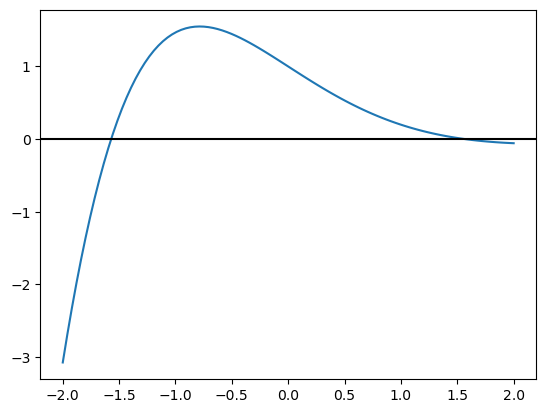

In [97]:
import matplotlib.pyplot as plt

def my_f(x):
    return np.exp(-x)*np.cos(x)
    
x = np.linspace(-2.0,2.0, num=100)
plt.plot(x, my_f(x))
plt.axhline(0, color='black')
plt.show()

Here we see there are two roots visible in the interval we plotted over, one in $[-2,-1]$ and another in $[1,2]$.  Now let's use our bisection function to zero in on the first root:

In [93]:
root = bisection(my_f,-2.0, 1.0, 0.001)
print("Best guess for root is ", root)

         p_i                    f(p_i)                         [a_(i+1), b_(i+1)]
                -0.5       1.4468890365841693     [                -2.0,                -0.5]
               -1.25       1.1005831869165565     [                -2.0,               -1.25]
              -1.625     -0.27513419390066923     [              -1.625,               -1.25]
             -1.4375       0.5595380857937036     [              -1.625,             -1.4375]
            -1.53125       0.1828127032730359     [              -1.625,            -1.53125]
           -1.578125     -0.03551341594628521     [           -1.578125,            -1.53125]
          -1.5546875      0.07624955813068525     [           -1.578125,          -1.5546875]
         -1.56640625     0.021025789547447247     [           -1.578125,         -1.56640625]
        -1.572265625    -0.007078415905375183     [        -1.572265625,         -1.56640625]
       -1.5693359375     0.007014915182200935     [        -1.572265625,

Let's try finding the second one, but this time with a tighter tolerance on the forward error.  We will suppress the output to avoid printing a long table:

In [100]:
root = bisection(my_f, 1.0, 2.0, 1e-9, output=False)
print("Best guess for root is ", root)

Converged in 30 iterations
Best guess for root is  1.5707963267341256


## Convergence of Root finding methods

A very reasonable question to ask for any root-finding method is: How fast is this method?  

> **Definition:** If
> 
> $$\lim_{i\rightarrow \infty} \frac{|p_{i+1}-p|}{|p_{i}-p|^\alpha} = C$$
> 
> for some constant $C\neq 0$, then we say the method has *order of convergence* $\alpha$.

For bisection, it should be clear that

$$|p_{i+1}-p| \leq |a_{i+1}-b_{i+1}|=\frac{1}{2}|a_{i}-b_{i}|$$

and

$$|p_{i}-p| \leq |a_{i}-b_{i}|$$

so that

$$\lim_{i\rightarrow \infty} \frac{|p_{i+1}-p|}{|p_{i}-p|^\alpha} =  \frac{1}{2}.$$

Thus, bisection has order of convergence $\alpha = 1$, or linear convergence.

It should also be clear that

$$ |p_n - p| \leq \frac{b-a}{2^n}$$

where $[a,b]$ is the intial bracketing interval.  As such, the convergence of the bisection method is actually independent of the details of $f(x)$.

## Stopping Criteria

In the bisection example we primarily used an absolute forward error test to stop.  There are a number of other possibilities including:

1. Stop before exceedig a maximun number of iterations
2. Absolute backward error test, $|f(p_{i+1})| \leq \epsilon_b$
3. Forward error test, either relative
  
   $$\frac{|p_{i+1}-p_i|}{|p_{i+1}|} \leq \epsilon_{rf}$$

   if $p_{i+1}$ is "away" from zero or absolute,

   $$|p_{i+1}-p_i| \leq \epsilon_{af}.$$
6. To avoid the issue of the failure of a relative error test when the root is close to zero (which you may not know *a priori*) one can use a mixed relative/absolute error test of the form
  
   $$|p_{i+1}-p_i| \leq \epsilon_{rf}|p_{i+1}| + \epsilon_{af}.$$

   Note that if $p_{i+1}\approx 0$ this is dominated by the second term so the test essentially becomes an absolute error test.  In contrast, if $|p_{i+1}|$ is large the second term is neglible and the test becomes a relative error.
